# Statisical biases


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

custom_palette = sns.color_palette('viridis', 2)
sns.set_palette(custom_palette)

# Simpson's paradox

## Berkeley Admissions Case Study


In the 70's, a study was conducted to evaluate whether there was gender-based discrimination in admissions to the university. 

The data is from six departments, called A-F.

We have information on whether the applicant was male or female and whether they were admitted or rejected.

We will examine whether there is discrimination against women in admission. 

### First look at the data

In [2]:
admissions_df = pd.read_csv('ucb-admit.csv')  
display(admissions_df)
admissions_df.describe()

,Admit,Gender,Dept
0,Admitted,Male,A
1,Admitted,Male,A
2,Admitted,Male,A
3,Admitted,Male,A
4,Admitted,Male,A
...,...,...,...
4521,Rejected,Female,F
4522,Rejected,Female,F
4523,Rejected,Female,F
4524,Rejected,Female,F


,Admit,Gender,Dept
count,4526,4526,4526
unique,2,2,6
top,Rejected,Male,A
freq,2771,2691,933


### Exploring gender bias
What can we say about the overall admission distribution based on gender?

Let's create a plot comparing the admission rates for males and females.

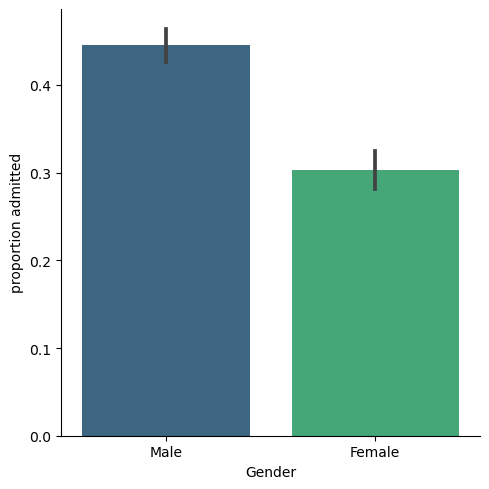

In [3]:
# admissions rates for males/females
admissions_df['Admitted_Boolean'] = admissions_df['Admit'].apply(lambda x: 1 if x=='Admitted' else 0)
ax = sns.catplot(data=admissions_df, x='Gender', y='Admitted_Boolean', kind='bar')
ax.set(ylabel="proportion admitted");

The error bar is an approximate 95% bootstrapped confidence interval!

What do you think? Is there bias?

### Drawing conclusions: Exercise
Is the difference in admission rates by gender statistically significant, at the 5% significance level?

In [4]:
# Complete code for hypothesis testing
''' HINT: you can re-use code from the previous lectures - you'll need to compute difference between averages,
run simulations, compute the confidence interval, and draw a conclusion'''

" HINT: you can re-use code from the previous lectures - you'll need to compute difference between averages,\nrun simulations, compute the confidence interval, and draw a conclusion"

What is your conclusion?

### Let's explore: Which departments admit females in lower rates?

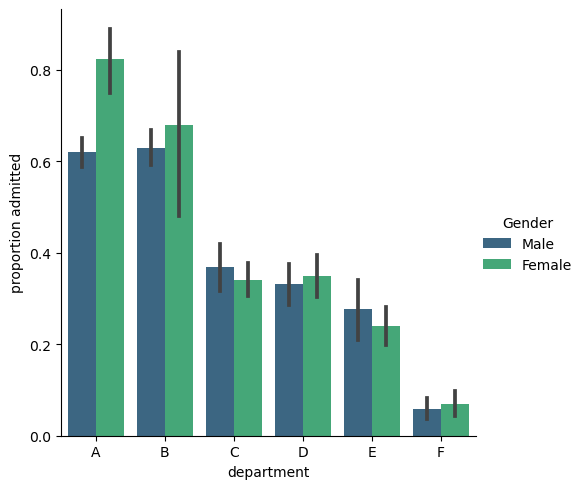

In [5]:
ax = sns.catplot(x='Dept', y='Admitted_Boolean', hue='Gender', data=admissions_df, hue_order=['Male','Female'], kind="bar")
ax.set(ylabel="proportion admitted", xlabel="department");

### What happened?
How come we do not see evidence for bias against females in admission rates in any department, and yet overall we see a difference in admission rates?

In [6]:
grpby_dept_gender = admissions_df.groupby(['Dept','Gender'])
counts_by_dept_gender = grpby_dept_gender.count().reset_index()
counts_by_dept_gender

,Dept,Gender,Admit,Admitted_Boolean
0,A,Female,108,108
1,A,Male,825,825
2,B,Female,25,25
3,B,Male,560,560
4,C,Female,593,593
5,C,Male,325,325
6,D,Female,375,375
7,D,Male,417,417
8,E,Female,393,393
9,E,Male,191,191


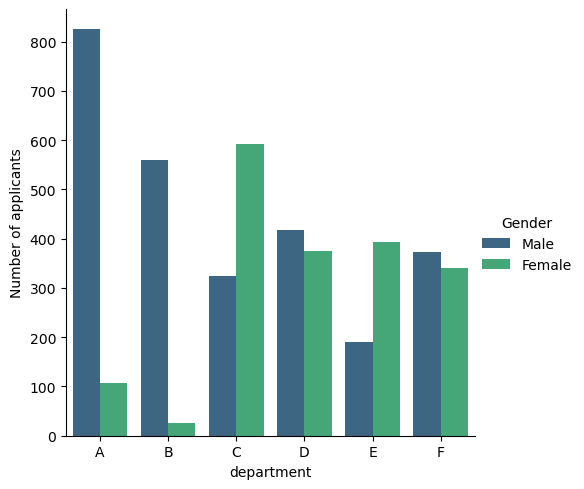

In [7]:
ax=sns.catplot(data=counts_by_dept_gender, x='Dept', y='Admit', hue='Gender', kind='bar',hue_order=['Male','Female'])
ax.set(ylabel="Number of applicants", xlabel="department");

# The inspection paradox

## Example: Purdue class size
Purdue is a large public university in Indiana. 

Students in Purdue have been complaining about the class sizes, raising the issue that they are too big and it is hard to have meaningful discussions. 

The board of education asked the dean to provide data regarding the distribution of undergraduate class sizes. Here is the outuput of the dean's report:

<img src="purdue fig.png">

(note that this is a bad way to show this type of information as it violates visualization principles that we discussed.) 

Yet, the Student Body in Purdue claims to have surveyd many students and the results were very different

We will now check how this is possible. First, we will create all classes in campus, as listed by the dean:

In [8]:
# Class size data originally from
# https://www.purdue.edu/datadigest/2013-14/InstrStuLIfe/DistUGClasses.html
# now available from
# https://web.archive.org/web/20160415011613/https://www.purdue.edu/datadigest/2013-14/InstrStuLIfe/DistUGClasses.html

sizes_bins = [(1, 1), 
              (2, 9),
              (10, 19),
              (20, 29),
              (30, 39),
              (40, 49),
              (50, 99),
              (100, 300)] # we assume 300 is the largest class possible

size_counts = [138, 635, 1788, 1979, 796, 354, 487, 333]

# This function creates actual (unbinned) classes
def get_all_classes(sizes_bins, size_counts):
    classes = []
    for i in np.arange(len(sizes_bins)):
        (low, high) = sizes_bins[i]
        count = size_counts[i]
        sample_class = np.random.randint(low, high+1, count)
        classes.extend(sample_class)
    return np.array(classes)

dean_class_report = get_all_classes(sizes_bins, size_counts)
dean_class_report

array([  1,   1,   1, ..., 268, 277, 247])

Average class size, according to dean: 34.6615975422427


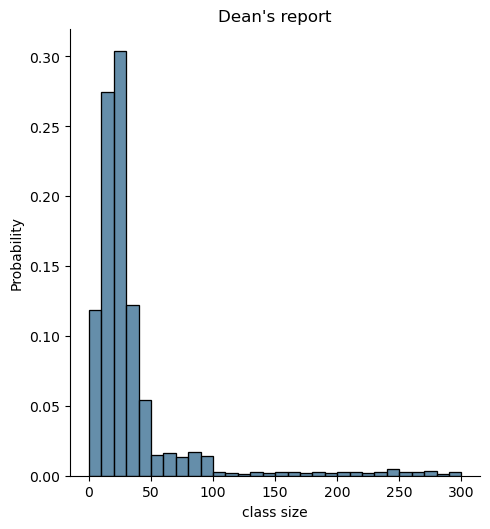

In [9]:
bins = np.arange(0,301,10)
ax=sns.displot(dean_class_report, bins=bins, stat='probability')
ax.set(xlabel="class size", title="Dean's report")
print('Average class size, according to dean:', dean_class_report.mean())

Now, let's get the Student Body's estimates. 

Let's say that the survey asked "in your most recent class, how many students were there?" We will further assume that each answer given reflects the true number of students in the class (no errors).

The crucial point is that the chances of sampling a student getting out from a class with 10 students is 10 divided by total number of students, whereas the chances of sampling a student getting out from a class with 100 students is 10 times as much.

In [10]:
N = 2000 # number of students sampled to answer the survey
def sample_students_from_classes(all_class_sizes):
    probs = all_class_sizes/np.sum(all_class_sizes) #probability to sample a student walking out from each of the "actual" classes
    sample_students = np.random.choice(all_class_sizes, size=N, replace=True, p=probs) # with replacement because we may sample more than one student from the same class
    return(sample_students)

students_class_report = sample_students_from_classes(dean_class_report)
students_class_report

array([279,  23,  22, ..., 208,  45,  15])

Average class size, according to students: 94.1485


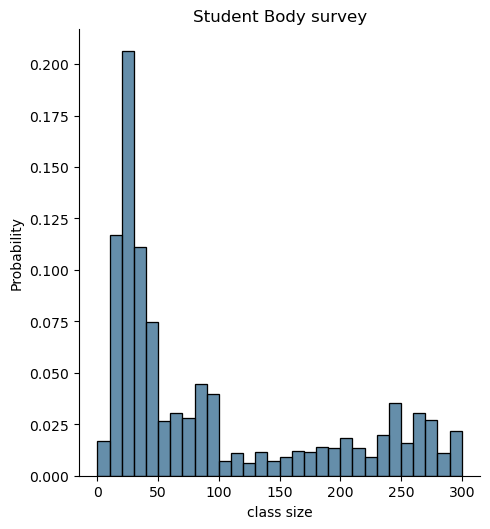

In [11]:
ax=sns.displot(students_class_report, bins=bins, stat='probability')
ax.set(xlabel='class size', title='Student Body survey')
print('Average class size, according to students:', students_class_report.mean())

,class size,according_to
0,1,dean
1,1,dean
2,1,dean
3,1,dean
4,1,dean
...,...,...
8505,15,students
8506,279,students
8507,208,students
8508,45,students


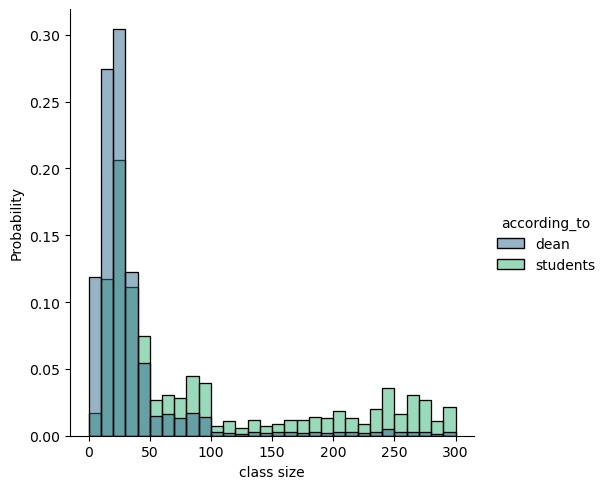

In [12]:
# Let's visualize the two distributions on the same graph

# If we want to use Seaborn, we need them both in the same data frame
dean_df = pd.DataFrame(dean_class_report, columns=['class size'])
students_df = pd.DataFrame(students_class_report, columns=['class size'])
dean_students_combined = pd.concat([dean_df.assign(according_to='dean'), students_df.assign(according_to='students')], ignore_index=True)
display(dean_students_combined)

# then, we can use the hue argument, along with common_norm=False, to compare the distributions on the same probability scale
sns.displot(data=dean_students_combined, x='class size', hue='according_to', stat='probability', bins=bins, common_norm=False)

We can see that the students are much more likely to report studying in large (>40 students) classes, and much less likely to report studying in small classes.

This is an example of the inspection paradox.

## Times between trains

The inspection paradox also happens when waiting for public transportation. Buses and trains are supposed to arrive at constant intervals, but in practice some intervals are longer than others. When arriving at a random time to the station, you are more likely to arrive within a long interval, simply because it is longer

Here is some data from trains in Boston. We will compare what passengers and what the train company "see":

In [13]:
# Times between consecutive trains (in sec)
time_between_trains = [
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0, 
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0, 
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0, 
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0, 
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0, 
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0, 
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
]
np.array(time_between_trains).mean()

466.0857142857143

In [14]:
N = 1000 # number of people arriving to train station
def sample_times_between_trains():
    probs = time_between_trains/np.sum(time_between_trains) 
    sample_times = np.random.choice(time_between_trains, size=N, replace=True, p=probs)
    return(sample_times)

experienced_time_between_trains = sample_times_between_trains()
experienced_time_between_trains.mean()

524.579

,wait time,according_to
0,428.0,train company
1,705.0,train company
2,407.0,train company
3,465.0,train company
4,433.0,train company
...,...,...
1065,351.0,passengers
1066,465.0,passengers
1067,433.0,passengers
1068,629.0,passengers


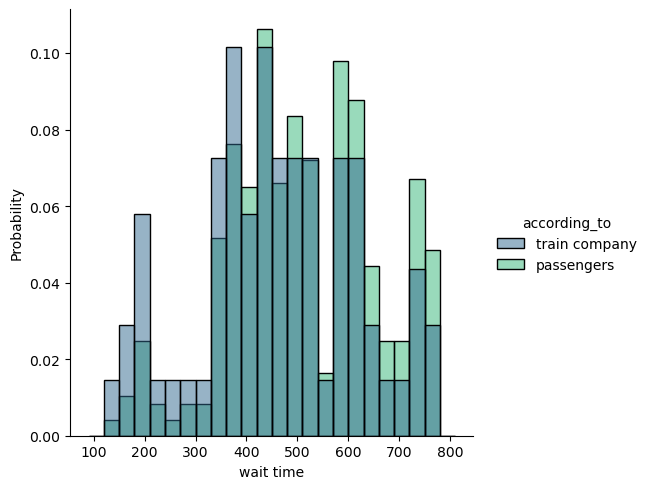

In [15]:
bins = np.arange(90, 811, 30)

company_df = pd.DataFrame(time_between_trains, columns=['wait time'])
passenger_df = pd.DataFrame(experienced_time_between_trains, columns=['wait time'])
company_passenger_combined = pd.concat([company_df.assign(according_to='train company'), passenger_df.assign(according_to='passengers')], ignore_index=True)
display(company_passenger_combined)

# then, we can use the hue argument, along with common_norm=False, to compare the distributions on the same probability scale
sns.displot(data=company_passenger_combined, x='wait time', hue='according_to', stat='probability', bins=bins, common_norm=False)

# plt.hist(time_between_trains, bins=bins, alpha=0.6, label='train company', density=True)
# plt.hist(experienced_time_between_trains, bins=bins, alpha=0.4, label='passengers',density=True)
# plt.legend(loc='upper right')
# plt.xlabel('time in seconds')
# plt.ylabel('density')

Again, we see that passengers' wait times are longer than the real time between trains